In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [4]:
def corr_heatmap_with_values(df, target=None):
    corr = df.corr()
    if not target==None:
        corr = pd.DataFrame(corr[target])
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(17,30))
    cmap = sns.color_palette("RdBu_r", 9)
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5,
           yticklabels=True, annot=True, fmt='.2f', cbar_kws={'shrink':.5})
    plt.title('Correlation Matrix', fontsize=20)
    plt.xticks(rotation=90, fontsize=11)
    plt.yticks(rotation=0, fontsize=11)
    plt.tight_layout()
    f.savefig('my_heatmap.png')

# Lookup DataFrames for Reference

In [5]:
#read in all of the useful dataframes
lookup_controlcodes = pd.read_csv('arc_full_survey/lookup_controlcodes.csv')
lookup_disability = pd.read_csv('arc_full_survey/lookup_disability.csv')
lookup_education = pd.read_csv('arc_full_survey/lookup_education.csv')
lookup_employertype = pd.read_csv('arc_full_survey/lookup_employertype.csv')
lookup_gender = pd.read_csv('arc_full_survey/lookup_gender.csv')
lookup_homeown = pd.read_csv('arc_full_survey/lookup_homeown.csv')
lookup_income = pd.read_csv('arc_full_survey/lookup_income.csv')
lookup_industry = pd.read_csv('arc_full_survey/lookup_industry.csv')
lookup_lifecycle = pd.read_csv('arc_full_survey/lookup_lifecycle.csv')
lookup_locationtype = pd.read_csv('arc_full_survey/lookup_locationtype.csv')
lookup_occupation = pd.read_csv('arc_full_survey/lookup_occupation.csv')
lookup_parkingtype = pd.read_csv('arc_full_survey/lookup_parkingtype.csv')
lookup_race = pd.read_csv('arc_full_survey/lookup_race.csv')
lookup_relation = pd.read_csv('arc_full_survey/lookup_relation.csv')
lookup_residencetype = pd.read_csv('arc_full_survey/lookup_residencetype.csv')
lookup_transittype = pd.read_csv('arc_full_survey/lookup_transittype.csv')
lookup_travelday = pd.read_csv('arc_full_survey/lookup_travelday.csv')
lookup_travelmode = pd.read_csv('arc_full_survey/lookup_travelmode.csv')
lookup_trippurpose = pd.read_csv('arc_full_survey/lookup_trippurpose.csv')
lookup_vehiclefuel = pd.read_csv('arc_full_survey/lookup_vehiclefuel.csv')
lookup_vehiclemake = pd.read_csv('arc_full_survey/lookup_vehiclemake.csv')
lookup_vehicleownership = pd.read_csv('arc_full_survey/lookup_vehicleownership.csv')
lookup_vehicletype = pd.read_csv('arc_full_survey/lookup_vehicletype.csv')

In [6]:
lookup_travelmode.head()

,id,description
0,1,Walk
1,2,Bike
2,3,Auto / Van / Truck Driver
3,4,Auto / Van / Truck Passenger
4,5,Local Bus


In [7]:
lookup_transittype.head()

,id,description
0,1,MARTA train
1,2,MARTA Bus
2,3,CAT
3,4,CCT
4,5,GCT


# Dataframes Proper

In [8]:
missed_trip_analysis = pd.read_csv('arc_full_survey/missedtripanalysis.csv')
survey_households = pd.read_csv('arc_full_survey/survey_households.csv')
survey_person = pd.read_csv('arc_full_survey/survey_person.csv')
survey_place = pd.read_csv('arc_full_survey/survey_place.csv')
survey_vehicles = pd.read_csv('arc_full_survey/survey_vehicles.csv')
survey_vehicles_class_nrel = pd.read_csv('arc_full_survey/survey_vehicles_class_nrel.csv')

/home/michael/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (61,71) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/michael/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (28,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [27]:
v_gpslinks = pd.read_csv('arc_full_survey/v_gpslinks.csv')
v_gpstrips = pd.read_csv('arc_full_survey/v_gpstrips.csv')
v_households = pd.read_csv('arc_full_survey/v_households.csv')
v_place = pd.read_csv('arc_full_survey/v_place.csv')
v_vehicles = pd.read_csv('arc_full_survey/v_vehicles.csv')
w_gpslinks = pd.read_csv('arc_full_survey/w_gpslinks.csv')
w_gpstrips = pd.read_csv('arc_full_survey/w_gpstrips.csv')
w_gpstripstages = pd.read_csv('arc_full_survey/w_gpstripstages.csv')
w_households = pd.read_csv('arc_full_survey/w_households.csv')
w_missedtripanalysis = pd.read_csv('arc_full_survey/w_missedtripanalysis.csv')
w_person = pd.read_csv('arc_full_survey/w_person.csv')
w_place = pd.read_csv('arc_full_survey/w_place.csv')
w_points = pd.read_csv('arc_full_survey/w_points.csv')

In [19]:
v_gpslinks.head()

,sampno,vehno,gpstripid,gpstravdayid,gpstravdaytripid,matchedlayer,matchedfield,featureorder,feautreid,seltype,direction,start_time,end_time,lrs_start,lrs_end,geom
0,4078569,1,1,1,1,arc_streets_topo,gid,1,REDACTED,1,-1,2011-03-23 11:30:30,2011-03-23 11:30:47,REDACTED,REDACTED,REDACTED
1,4078569,1,1,1,1,arc_streets_topo,gid,2,REDACTED,1,1,2011-03-23 11:30:47,2011-03-23 11:30:55,REDACTED,REDACTED,REDACTED
2,4078569,1,1,1,1,arc_streets_topo,gid,3,REDACTED,1,1,2011-03-23 11:30:55,2011-03-23 11:31:00,REDACTED,REDACTED,REDACTED
3,4078569,1,1,1,1,arc_streets_topo,gid,4,REDACTED,1,1,2011-03-23 11:31:00,2011-03-23 11:31:17,REDACTED,REDACTED,REDACTED
4,4078569,1,1,1,1,arc_streets_topo,gid,5,REDACTED,1,1,2011-03-23 11:31:17,2011-03-23 11:31:39,REDACTED,REDACTED,REDACTED


In [20]:
v_gpstrips.head()

,sampno,vehno,gpstripid,gpstravdayid,gpstravdaytripid,start_time,end_time,duration_min,distance_miles,avg_speed_mph,...,destination_lat,destination_distfromlast,region_type,workrelated,nontransport,onsite,looptrip,origin_loc_type,destination_loc_type,geom
0,4144737,1,50,6,2,2011-08-29 15:37:33,2011-08-29 15:42:44,5.17,1.97,22.92,...,REDACTED,270.99,1,0,0,0,0,OTHER,OTHER,REDACTED
1,4145185,3,2,1,2,2011-08-23 18:52:38,2011-08-23 19:20:07,27.47,10.48,22.88,...,REDACTED,25.51,1,0,0,0,0,WORK,OTHER,REDACTED
2,4204684,1,23,5,3,2011-05-17 14:48:37,2011-05-17 14:51:45,3.13,1.16,22.31,...,REDACTED,25.65,1,0,0,0,0,OTHER,HOME,REDACTED
3,4146737,2,6,6,4,2011-05-31 12:09:06,2011-05-31 12:16:10,7.07,1.56,13.28,...,REDACTED,2.75,1,0,0,0,0,OTHER,OTHER,REDACTED
4,4204708,1,44,4,10,2011-05-16 15:28:53,2011-05-16 15:31:30,2.61,0.37,8.60,...,REDACTED,6.16,1,0,0,0,0,OTHER,OTHER,REDACTED


In [21]:
v_households.head()

,sampno,home_county_id,vehicle_count,vehicle_count_gps,travel_day1,gps_trips_td,gps_trips_27,gps_tripcount,diary_trips_td,gps_complete,...,gps_complete_no_diary,gps_obd_diary_complete,gps_partial_no_diary,diary_complete_no_gps,incomplete,incentive_pad,traveldatediscrepancy,returned,control_code,geom
0,4000208,13223,1,1,2011-04-21,9,46,55,0,1,...,0,0,0,0,0,1,0,1,8,REDACTED
1,4000263,13135,3,3,2011-05-02,0,0,0,0,1,...,1,0,0,0,0,0,0,1,8,REDACTED
2,4000317,13067,2,1,2011-04-27,0,50,50,0,1,...,0,0,0,0,0,1,0,1,8,REDACTED
3,4000412,13063,3,3,2011-03-21,15,26,41,13,1,...,0,0,0,0,0,1,0,1,8,REDACTED
4,4000505,13089,1,1,2011-04-29,0,0,0,0,1,...,0,0,0,0,0,1,0,1,8,REDACTED


In [22]:
v_place.head()

,sampno,vehno,gpsplaceid,diaryvehplaceid,arr_match_type,dep_match_type,name,address,city,lon,...,dep_lat,distance,arr_time,dep_time,arr_gpstime,dep_gpstime,loc_type,arr_loc_type,dep_loc_type,geom
0,4000208,1,1.0,NaN,NaN,9.0,REDACTED,REDACTED,NaN,REDACTED,...,REDACTED,NaN,NaN,NaN,NaN,2011-04-21 10:48:31,NaN,NaN,HOME,REDACTED
1,4000676,1,5.0,NaN,NaN,9.0,REDACTED,REDACTED,NaN,REDACTED,...,REDACTED,NaN,NaN,NaN,2011-05-16 16:57:24,2011-05-17 06:38:33,NaN,HOME,HOME,REDACTED
2,4001538,1,1.0,1.0,NaN,1.0,REDACTED,REDACTED,ATLANTA,REDACTED,...,REDACTED,44689.0,2011-03-28 03:00:00,2011-03-28 09:20:00,NaN,2011-03-28 09:23:40,Home,NaN,HOME,REDACTED
3,4002973,1,NaN,5.0,NaN,8.0,REDACTED,REDACTED,NaN,REDACTED,...,REDACTED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,REDACTED
4,4003802,1,1.0,1.0,NaN,2.0,REDACTED,REDACTED,NaN,REDACTED,...,REDACTED,NaN,NaN,NaN,NaN,2011-04-12 15:12:49,NaN,NaN,OTHER,REDACTED


In [23]:
v_vehicles.head()

,sampno,vehno,diarytripsday1,gpstripsday1,gpstripsday2,gpstripsday3,gpstripsday4,gpstripsday5,gpstripsday6,gpstripsday7,totalgpstrips,geom
0,4085051,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,REDACTED
1,4000263,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,REDACTED
2,4234748,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,REDACTED
3,4000208,1,0.0,9.0,10.0,8.0,7.0,4.0,10.0,7.0,55.0,REDACTED
4,4000317,1,0.0,0.0,4.0,18.0,6.0,6.0,6.0,10.0,50.0,REDACTED


In [24]:
w_gpslinks.head()

,sampno,perno,gpstripid,gpstravdayid,gpstravdaytripid,matched_layer,matched_field,feature_order,feature_id,sel_type,direction,start_time,end_time,lrs_start,lrs_end,geom
0,4052380,2,1,1,1,arc_streets_topo,gid,1,REDACTED,1,1,2011-08-31 10:18:13,2011-08-31 10:18:18,REDACTED,REDACTED,REDACTED
1,4052380,2,1,1,1,arc_streets_topo,gid,2,REDACTED,1,1,2011-08-31 10:18:18,2011-08-31 10:18:28,REDACTED,REDACTED,REDACTED
2,4052380,2,1,1,1,arc_streets_topo,gid,3,REDACTED,1,1,2011-08-31 10:18:28,2011-08-31 10:18:55,REDACTED,REDACTED,REDACTED
3,4052380,2,1,1,1,arc_streets_topo,gid,4,REDACTED,1,1,2011-08-31 10:18:55,2011-08-31 10:19:28,REDACTED,REDACTED,REDACTED
4,4052380,2,2,1,2,arc_streets_topo,gid,1,REDACTED,1,-1,2011-08-31 11:22:39,2011-08-31 11:22:49,REDACTED,REDACTED,REDACTED


In [25]:
w_gpstrips.head()

,sampno,perno,gpstripid,gpstravdayid,gpstravdaytripid,start_time,end_time,duration_min,distance_miles,avg_speed_mph,...,destination_lat,distancefromlastdest,region_type,workrelated,no_transport,onsite,looptrip,origin_loc_type,destination_loc_type,geom
0,4000223,1,1,1,1,2011-05-05 06:58:10,2011-05-05 07:22:26,24.27,4.81,11.90,...,REDACTED,NaN,1,0,0,0,0,OTHER,OTHER,REDACTED
1,4000223,1,2,1,2,2011-05-05 11:20:02,2011-05-05 11:30:11,10.14,2.75,16.30,...,REDACTED,NaN,1,0,0,0,0,OTHER,HOME,REDACTED
2,4000223,1,3,1,3,2011-05-05 11:34:21,2011-05-05 11:35:35,1.23,0.06,3.18,...,REDACTED,116.54,1,0,0,0,0,HOME,HOME,REDACTED
3,4007162,2,1,1,1,2011-03-29 07:04:12,2011-03-29 07:06:00,1.79,1.17,39.13,...,REDACTED,NaN,1,0,0,0,0,OTHER,OTHER,REDACTED
4,4000223,1,4,3,1,2011-05-07 11:12:51,2011-05-07 11:32:44,19.87,3.70,11.18,...,REDACTED,NaN,1,0,0,0,0,OTHER,OTHER,REDACTED


In [26]:
w_gpstripstages.head()

,sampno,perno,gpstripid,gpstravdayid,gpstravdaytripid,stage_id,start_time,end_time,duration_min,distance_max,avg_speed_mph,avg_gpsspeed,max_speed_mph,travel_mode,origin_lon,origin_lat,destination_lon,destination_lat,geom
0,4000223,1,1,1,1,1,2011-05-05 06:58:10,2011-05-05 07:13:33,15.3833,4.47,22.35,22.35,40.29,3,REDACTED,REDACTED,REDACTED,REDACTED,REDACTED
1,4000223,1,1,1,1,2,2011-05-05 07:15:18,2011-05-05 07:22:26,7.1333,0.25,1.94,1.94,4.19,1,REDACTED,REDACTED,REDACTED,REDACTED,REDACTED
2,4000223,1,5,3,2,1,2011-05-07 11:39:48,2011-05-07 11:43:45,3.9500,0.15,2.06,2.06,3.29,1,REDACTED,REDACTED,REDACTED,REDACTED,REDACTED
3,4003707,2,1,1,1,2,2011-03-31 12:36:07,2011-03-31 12:40:04,3.9500,0.19,2.94,2.94,9.19,1,REDACTED,REDACTED,REDACTED,REDACTED,REDACTED
4,4000223,1,6,3,3,1,2011-05-07 11:44:54,2011-05-07 11:48:21,3.4500,0.07,1.86,1.86,3.00,1,REDACTED,REDACTED,REDACTED,REDACTED,REDACTED


In [28]:
w_households.head()

,sampno,home_county_id,persons_count,persons_count_gps,travel_day1,gps_trips_td,gps_trips_23,gps_trip_count,diary_trips_td,gps_complete,...,gps_obd_diary_complete,gps_partial_no_diary,diary_complete_no_gps,incomplete,incentive_qual,incentive_paid,traveldatediscrepancy,returned,control_code,geom
0,4015348,13121,1,1,2011-03-25,0,0,0,0,0,...,0,0,0,1,0,0,0,1,10,REDACTED
1,4060950,13135,3,2,2011-05-10,0,0,0,0,1,...,0,0,0,0,0,0,0,1,8,REDACTED
2,4096153,13135,2,2,2011-03-18,2,7,9,0,1,...,0,0,0,0,0,0,0,1,8,REDACTED
3,4115637,13121,3,1,2011-08-17,0,0,0,0,0,...,0,0,0,1,0,0,0,1,9,REDACTED
4,4198159,13089,4,2,2011-08-20,2,4,6,0,1,...,0,0,0,0,0,0,0,1,8,REDACTED


In [29]:
w_missedtripanalysis.head()

,sampno,perno,hhgpsdiarycomplete,nbgpstripdiaryday,nbdiaryreportedtrips,rawmatchdifference,nbmissinggpstrips,nbmissingdiarytrips,totalgps27,nbadjustedmissdiary,unmatchedonsitetrips,unmatchednontransportationtrips,unmatchedworktrips,unmatchedexternaltrips,unmatchedlooptrips
0,4000223,1,1,3,4,-1,1,0,6,0,0,0,0,0,0
1,4001696,1,1,6,5,1,0,1,24,0,0,1,0,0,1
2,4001696,2,1,7,4,3,0,3,20,2,0,1,0,0,1
3,4001952,1,1,11,8,3,0,3,8,3,0,0,0,0,0
4,4001952,2,1,5,4,1,0,1,5,1,0,0,0,0,0


In [30]:
w_person.head()

,sampno,perno,diarytripsday1,gpstripsday1,gpstripsday2,gpstripsday3,totalgpstrips,transit,walkbike,geom
0,4000223,1,4.0,3.0,0.0,6.0,9.0,0.0,0.0,REDACTED
1,4001696,1,5.0,6.0,9.0,15.0,30.0,0.0,0.0,REDACTED
2,4001696,2,4.0,7.0,4.0,16.0,27.0,0.0,0.0,REDACTED
3,4001952,1,8.0,11.0,3.0,5.0,19.0,0.0,0.0,REDACTED
4,4001952,2,4.0,5.0,5.0,0.0,10.0,0.0,0.0,REDACTED


In [31]:
w_place.head()

,sampno,perno,gpsplaceid,diaryvehplaceid,arr_match_type,dep_match_type,name,address,city,lon,...,dep_gpslat,distance,arr_time,dep_time,arr_gpstime,dep_gpstime,loc_type,arr_loc_type,dep_loc_type,geom
0,4001696,2,1.0,NaN,NaN,5.0,REDACTED,REDACTED,NaN,REDACTED,...,REDACTED,NaN,NaN,NaN,NaN,2011-04-28 10:42:38,NaN,NaN,HOME,REDACTED
1,4001952,2,6.0,NaN,NaN,9.0,REDACTED,REDACTED,NaN,REDACTED,...,REDACTED,NaN,NaN,NaN,2011-04-29 21:22:20,2011-04-30 13:26:20,NaN,HOME,HOME,REDACTED
2,4004924,1,4.0,NaN,NaN,9.0,REDACTED,REDACTED,NaN,REDACTED,...,REDACTED,NaN,NaN,NaN,2011-04-04 20:27:32,2011-04-05 08:38:20,NaN,HOME,HOME,REDACTED
3,4011116,1,7.0,NaN,5.0,5.0,REDACTED,REDACTED,NaN,REDACTED,...,REDACTED,NaN,NaN,NaN,2011-04-21 21:02:20,2011-04-21 21:02:45,NaN,HOME,HOME,REDACTED
4,4012818,3,3.0,NaN,NaN,9.0,REDACTED,REDACTED,NaN,REDACTED,...,REDACTED,NaN,NaN,NaN,2011-04-13 16:48:58,2011-04-14 16:12:21,NaN,HOME,HOME,REDACTED


In [32]:
w_points.head()

,sampno,perno,gpstripid,localid,time_local,longitude,latitude,gpsspeed,geom
0,4000223,1,1,2415,2011-05-05 06:58:10,REDACTED,REDACTED,38.400001,REDACTED
1,4000223,1,1,2416,2011-05-05 06:58:13,REDACTED,REDACTED,40.299999,REDACTED
2,4000223,1,1,2417,2011-05-05 06:58:16,REDACTED,REDACTED,38.700000,REDACTED
3,4000223,1,1,2418,2011-05-05 06:58:19,REDACTED,REDACTED,37.599998,REDACTED
4,4000223,1,1,2419,2011-05-05 06:58:22,REDACTED,REDACTED,36.599998,REDACTED


### Use with caution: 2.5GB DataFrame:

In [ ]:
v_points = pd.read_csv('arc_full_survey/v_points.csv')

In [7]:
columns = ['sampno', 'perno', 'plano', 'arr_time', 'dep_time', 'trip_distance_miles', 'mode']
survey_place_less = survey_place[columns]

In [14]:
survey_place_less.corr()

,sampno,perno,plano,trip_distance_miles,mode
sampno,1.000000,0.021513,0.014977,-0.000844,-0.001057
perno,0.021513,1.000000,-0.118353,-0.028053,0.092668
plano,0.014977,-0.118353,1.000000,-0.028137,-0.041203
trip_distance_miles,-0.000844,-0.028053,-0.028137,1.000000,0.442774
mode,-0.001057,0.092668,-0.041203,0.442774,1.000000


/home/michael/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (61,71) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


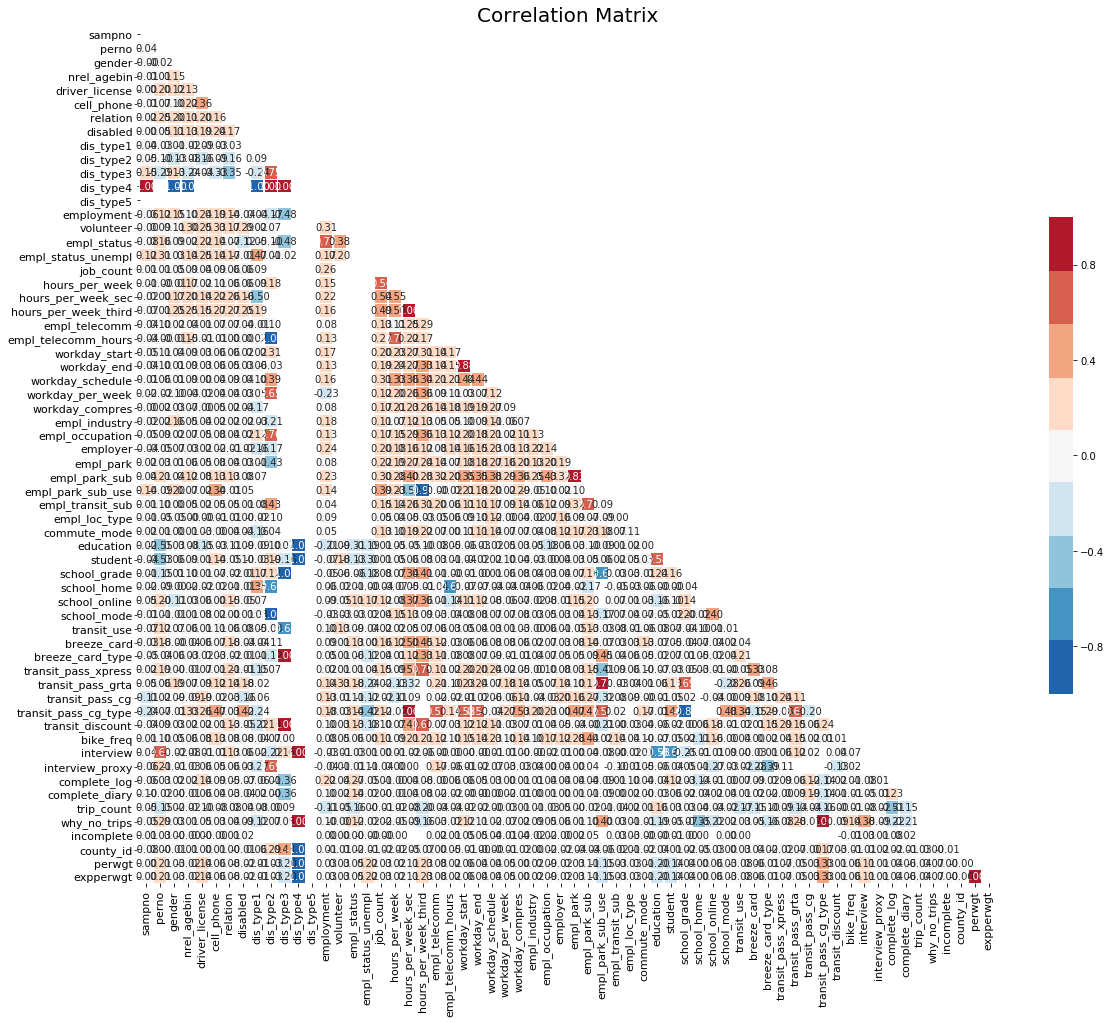

In [35]:
survey_person = pd.read_csv('arc_full_survey/survey_person.csv')
corr_heatmap_with_values(survey_person)

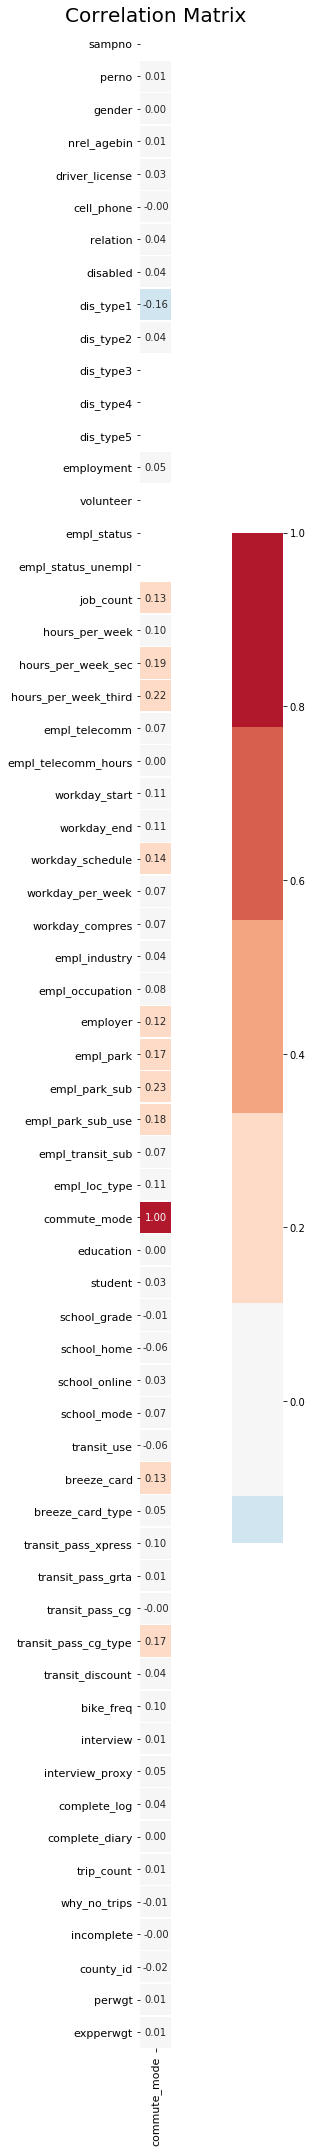

In [52]:
corr_heatmap_with_values(survey_person, target='commute_mode')